前向传播
1. 将输入值乘以权重
2. 计算激活值
3. 在每个神经元上重复前两个步骤，直到输出层
4. 预测值与真实值进行比较


In [ ]:
# -*- coding: utf-8 -*-

# 前馈网络
import numpy as np

# 变量值、权重和输出作为feed_forward的参数
def feed_forward(inputs, outputs, weights):
    # 输入层和权重相乘
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    # 使用sigmoid函数作为激活函数
    hidden = 1 / (1 + np.exp(-pre_hidden))
    # 隐藏层和权重相乘
    pred_output = np.dot(hidden, weights[2]) + weights[3]
    # 计算loss
    loss = np.mean((pred_output - outputs) ** 2)
    return loss

: 

In [ ]:
import numpy as np
from copy import deepcopy 
# 使用有限差分法计算梯度并更新权重
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    
    original_loss = feed_forward(inputs, outputs, weights)
    # 遍历网络所有层
    for i, layer in enumerate(weights):
        for idx, val in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][idx] += 1e-5
            new_loss = feed_forward(inputs, outputs, temp_weights)
            # 计算梯度 
            grad = (new_loss - original_loss) / 1e-5
            # 更新权重
            updated_weights[i][idx] -= lr * grad
            return updated_weights, original_loss


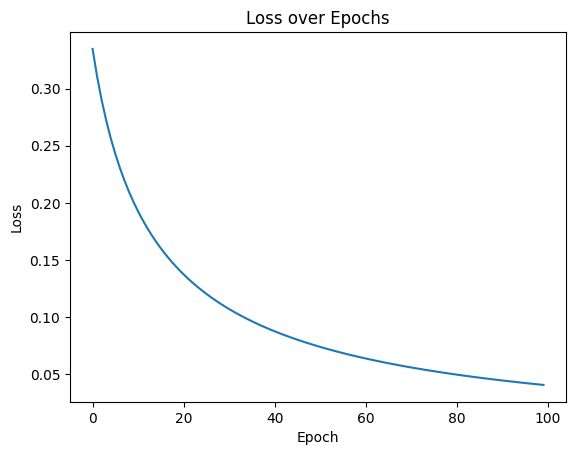

[array([[-0.00406831, -0.58093957, -0.18456105],
       [ 0.38048055, -0.51940516,  0.19049262]]), array([-0.01285888,  0.56164475, -0.06194351]), array([ 0.16103385, -0.15455944, -0.04175402]), array([-0.2180221])]
Predicted output: 0.04010978621041606


In [ ]:
# 使用上述函数写一个神经网络进行求解的例子
import numpy as np
import matplotlib.pyplot as plt

def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = 1 / (1 + np.exp(-pre_hidden))
    pred_output = np.dot(hidden, weights[2]) + weights[3]
    loss = np.mean((pred_output - outputs) ** 2)
    return loss

def updates_weights(inputs, outputs, weights, lr):
    original_loss = feed_forward(inputs, outputs, weights)
    for i,layer in enumerate(weights):
        for idx, val in np.ndenumerate(layer):
            weights[i][idx] += 1e-5
            loss = feed_forward(inputs, outputs, weights)
            grad = (loss - original_loss) / 1e-5
            weights[i][idx] -= lr * grad
    return weights, original_loss

x = np.array([[1, 1]])
y = np.array([0])

W = [
    np.array([[-0.0053,0.3793],
    [-0.5820,-0.5204],
    [-0.1855,0.1896]]).T,
    np.array([-0.0140, 0.5607, -0.0628]),
    np.array([0.1566,-0.1745,-0.1135]).T,
    np.array([-0.5516]),
]

losses = []
for epoch in range(100):
    W, loss = updates_weights(x, y, W, 1e-4)
    losses.append(loss)
    
# 绘制损失值曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

print(W)
    
    
output = feed_forward(x, y, W)
print("Predicted output:", output)
